In [ ]:
# Custom perceptron
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# PART 1
class Perceptron:

    def __init__(self, iterations = 50, weights_init = 'zeros', activation = 'step'): 
        self.iterations = iterations # number of iterations (epochs) of learning
        self.weights_init = weights_init # parameter of weights initialization
        self.weights = None
        self.bias = None # offset (rus. смещение)
        self.activation = activation


    def _weights_init(self, features) -> None: 
        match self.weights_init:
            case 'zeros':
                self.weights = numpy.zeros(features)
                self.bias = 0

            case 'random':
                self.weights = numpy.random.randn(features)
                self.bias = numpy.random.randn()

            case _:
                raise ValueError('Unexpected weights initialization parameter.')

    def _activation_func(self, X):
        match self.activation:
            case 'step': # step function
                return numpy.where(X > 0, 1, 0)
            case _:
                raise ValueError('Unexpected activation parameter.')

    def fit(self, X, Y) -> None:
        samples, features = X.shape # dimensions defenition
        self._weights_init(features) # initializing weights
        # learning & training
        for i in range (self.iterations):
            for index, features in enumerate(X):
                input = numpy.dot(features, self.weights) + self.bias
                Y_predict = self._activation_func(input)
                # updating weights
                update = (Y[index] - Y_predict)
                self.weights += features * update
                self.bias += update


    def predict(self, X):
        input = numpy.dot(X, self.weights) + self.bias
        Y_predict = self._activation_func(input)
        return Y_predict

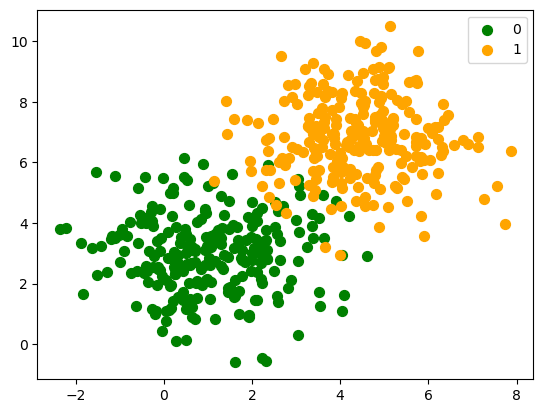

In [7]:
# Working with data

n_samples = 500 # data generation
data, labels = make_blobs(
    n_samples = n_samples,
    centers=([1.1, 3], [4.5, 6.9]),
    cluster_std = 1.3,
    random_state = 0
)

colors = ('green', 'orange') # visualization
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(
        data[labels == n_class][:, 0],
        data[labels == n_class][:, 1],
        c = colors[n_class],
        s = 50,
        label = str(n_class)
)
plt.legend()
plt.show()


In [14]:
# model training
custom_perceptron = Perceptron(iterations = 50, weights_init='zeros')
custom_perceptron.fit(data, labels)
custom_predict = custom_perceptron.predict(data)
# calculating accuracy
custom_accuracy = accuracy_score(labels, custom_predict)
print(f'Custom perceptron accuracy score: {custom_accuracy}')


Custom perceptron accuracy score: 0.972


In [17]:
# PART 2
from sklearn.linear_model import Perceptron as SkPerceptron

perceptron = SkPerceptron(max_iter = 50, random_state = 0)
perceptron.fit(data, labels)
predict = perceptron.predict(data)
# calculating accuracy
accuracy = accuracy_score(labels, predict)
print(f'Perceptron accuracy score: {accuracy}')

if ((custom_accuracy - accuracy) > 0): print('Custom perceptron is more accurate.')
else: print('Sklearn perceptron is more accurate.')

Perceptron accuracy score: 0.96
Custom perceptron is more accurate.


In [16]:
# Working with Iris data & comparing with SVM
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# loading 100 latest records
iris = load_iris()
X = iris.data[-100:]
Y = iris.target[-100:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

perceptron = SkPerceptron(max_iter = 50)
perceptron.fit(X_train, Y_train)
Y_predict = perceptron.predict(X_test)
# calculating accuracy
accuracy = accuracy_score(Y_test, Y_predict)
print(f'Perceptron accuracy score: {accuracy}')

# SVM
model_SVM = SVC()
model_SVM.fit(X_train, Y_train)
SVM_predict = model_SVM.predict(X_test)
# calculating accuracy
SVM_accuracy = accuracy_score(Y_test, SVM_predict)
print(f'SVM accuracy score: {SVM_accuracy}')

if ((accuracy - SVM_accuracy) > 0): print('Perceptron is more accurate.')
else: print('SVM is more accurate.')


Perceptron accuracy score: 0.9333333333333333
SVM accuracy score: 0.9
Perceptron is more accurate.
